In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

import cosmo_wap as cw

# compute cosmology with class

In [2]:
#import and define cosmlogy in class
from classy import Class

#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 100 #UNITS: 1/Mpc # is also set to 10 later #100 for sigma integration
params = {'output':'mPk,mTk',
             'non linear':'halofit',
             'Omega_b':Omega_b,
             'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
             'h':h,
             'n_s':n_s,
             'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
             'P_k_max_1/Mpc':k_max,
             'z_max_pk':10. 
}

#Initialize the cosmology and compute everything
cosmo = Class()
cosmo.set(params)
cosmo.compute()

# So we need to also define survey specific parameters like biases

In [3]:
survey_params = cw.survey_params.SurveyParams(cosmo)

In [4]:
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.BGS])

Computing bias params...


NameError: name 'EulBias' is not defined

## Import expression for each contributions

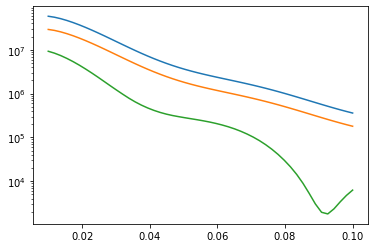

In [15]:
k= np.linspace(0.01,0.1)
plt.plot(k,np.abs(bk.WA1.l1(cosmo_functions,k,k,k,zz=1,r=1,s=0)))
plt.plot(k,np.abs(bk.WA1.l1(cosmo_functions,k,k,k,zz=1,r=0,s=0)))
plt.plot(k,np.abs(bk.RR1.l1(cosmo_functions,k,k,k,zz=1,r=0,s=0)))
plt.yscale('log')

In [20]:
#see which mutlipoles are stored for each terms
def which_multipoles(func):
    return [key for key in func.__dict__.keys() if not key.startswith('_')]
    
print(which_multipoles(bk.RR1))

['l1', 'l1m1', 'l3', 'l3m1', 'l3m2', 'l3m3']


### CosmologicalFunctions takes in the cosmology and survey_params 

In [16]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)

now all parameters we need are computable from cosmo_functions - lets look at an example

In [17]:
#so now we set bispectrum as a function of k1,k2,theta and z

zz=1 # redshift

#so lets look at the bispectrum as function of theta for fixed k1 and k2 

k1=0.04
k2=k1/2
theta = np.linspace(0,np.pi,200)
k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

Everything is vectorised so - we can always create meshes to compute the bispectrum over different scales and shapes


### so all terms have this structure
- XX.lX(cosmo_functions,k1,k2,k3=None,theta=None,zz=0,r=0,s=0,nonlin=False,growth2=False)


## So now we have everything we need to get the bispectrum

In [ ]:
cosmo_funcs,k1,k2,k3=None,theta=None,zz=0,r=0,s=0

Text(0, 0.5, '$ \\text{Imag}[B_{\\ell=1}(k1=0.04,k2=0.02)] $')

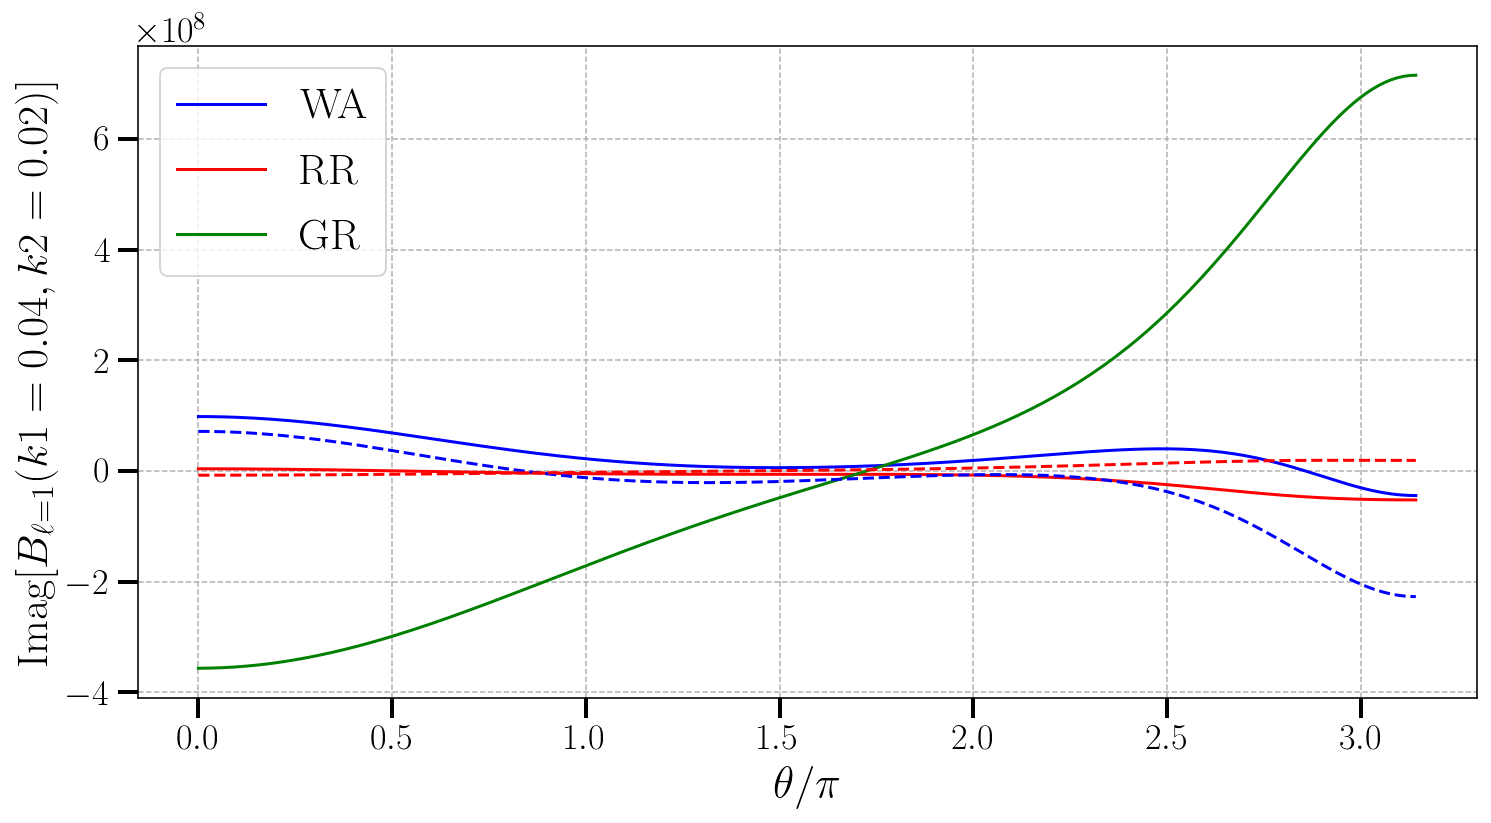

In [19]:
plt.figure(figsize=(12,6))

#also set LOS to d = x_3
r=s=0
#plot first order parts
plt.plot(theta,WA1.l1(params,r,s).imag,color='blue',label='WA')
plt.plot(theta,RR1.l1(params,derivs,r,s).imag,color='red',label='RR')
plt.plot(theta,GR1.l1(params,betas).imag,color='green',label='GR')

#or we could plot say for 
#also set LOS to d = x_1
r=1;s=0 
plt.plot(theta,WA1.l1(params,r,s).imag,'--',color='blue')
plt.plot(theta,RR1.l1(params,derivs,r,s).imag,'--',color='red')


plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$\theta/ \pi\,$')
plt.ylabel(r'$ \text{Imag}[B_{\ell=1}(k1=0.04,k2=0.02)] $')

## Or for example second order even stuff

In [20]:
zz=1

r=s=1/3 #this makes sense for monopole
k1 = np.linspace(0.05,0.1)
k3 = k1
k2= 0.01
theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))#k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=SKAO2_dict)#so for SKAO2
params = cosmo_functions.get_params(k1,k2,theta,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)

#term for fNL=1
fNL =1
PNGparams = cosmo_functions.get_PNGparams(1,zz,k1,k2,k3)

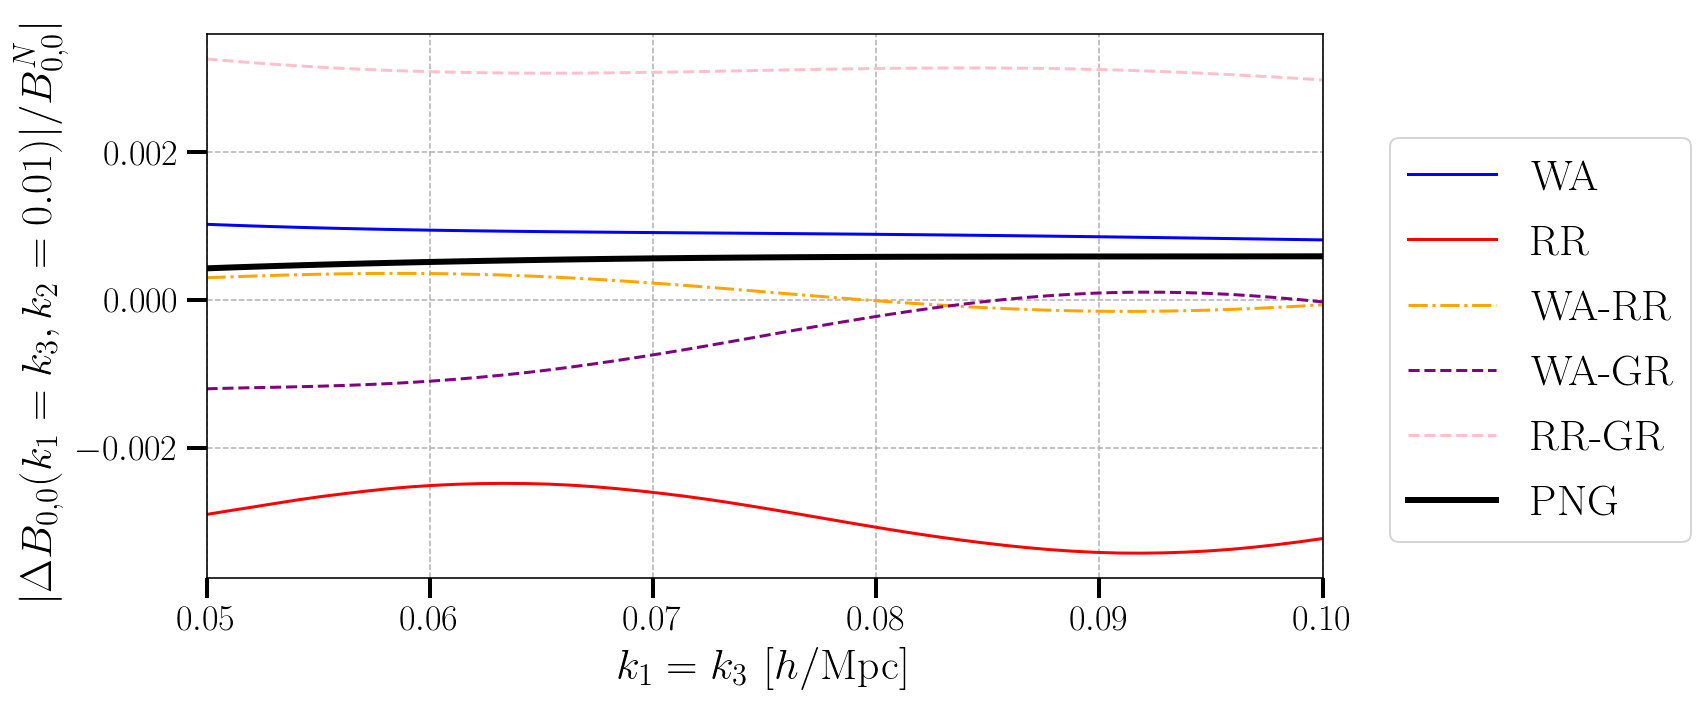

In [21]:
#so lets plot monopole...
plt.figure(figsize=(10,5))
r=0;s=0

#plt.plot(k3,GR2.l0(params,betas)/Bk0.l0(params),'-.',label='GR',color='green')

plt.plot(k3,WA2.l0(params,r,s)/Bk0.l0(params),'-',label='WA',color='blue')
plt.plot(k3,RR2.l0(params,derivs,r,s)/Bk0.l0(params),'-',label='RR',color='red')
plt.plot(k3,WARR.l0(params,derivs,r,s)/Bk0.l0(params),'-.',label='WA-RR',color='orange')

plt.plot(k3,WAGR.l0(params,betas,r,s)/Bk0.l0(params),'--',label='WA-GR',color='purple')
plt.plot(k3,RRGR.l0(params,derivs,betas,r,s)/Bk0.l0(params),'--',label='RR-GR',color='pink')


plt.plot(k3,(PNG.l0(params,PNGparams)-Bk0.l0(params))/Bk0.l0(params),'-',label='PNG',color='black',linewidth =3)
plt.xlabel('$ k_1=k_3 \,\,[h/\mathrm{Mpc}]$')
plt.ylabel(r'$|\Delta B_{0,0}(k_1=k_3,k_2=0.01)|/B^N_{0,0}|$')

plt.xlim(0.05,0.10)
plt.legend(bbox_to_anchor=(0.85, 0.35, 0.5, 0.5))
plt.grid(ls='--',lw=0.75)
#plt.ylim(0,0.003)
plt.savefig('plots/second_order_lots.png', bbox_inches='tight', dpi=300)
plt.show()

# Numerical derivs - e.g. for FOG damping 

### $\mu$ and $\phi$ dependent expressions

Additionaly we can just access the full local bispectrum expression before we integrate to get the multipoles

In [25]:
#also have mu dependent expressions
from WA_1 import WA_1
from GR_0 import Bk_0
from GR_1 import GR_1
from GR_2 import GR_2


This has the format:
```python
WA_1(params,r,s,mu,phi)
GR_0(params,mu,phi)
GR_1(params,betas,mu,phi)
```
etc

In [26]:
# The functions are vectorised and can use the numeric_ylm integrator as long as:
# the first dimension must be 1 for all arrays in params

#define params
zz=0.5
k1 = 0.05
k2 = 0.05
theta = np.linspace(0,np.pi)#np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

#also for integration we need the last two axis to be dimension 1 for array objects
theta_= theta[..., None, None]
k1_= k1#[..., None, None]
k2_= k2#[..., None, None]

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=BGS_dict)
params2 = cosmo_functions.get_params(k1_,k2_,theta_,zz) # params for integral
params = cosmo_functions.get_params(k1,k2,theta,zz) # normal params
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)


### for example wide angle dipole

CPU times: user 1.52 s, sys: 6.05 ms, total: 1.52 s
Wall time: 1.53 s


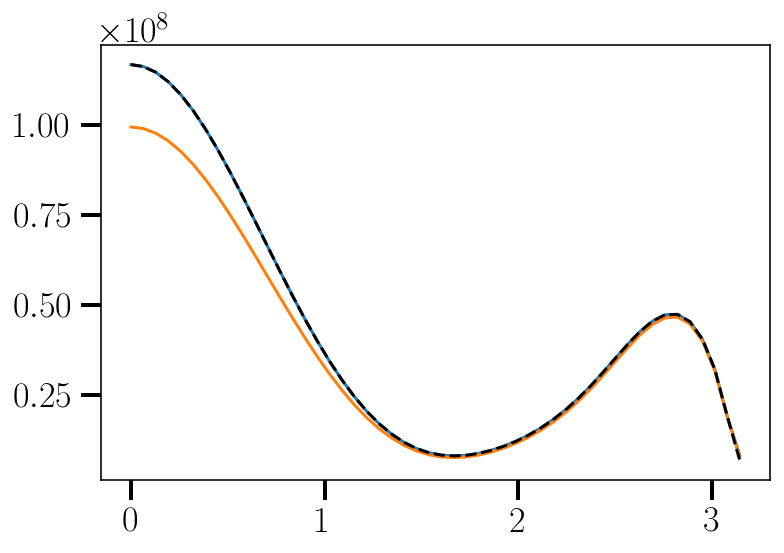

In [27]:
%%time
l=1
m=0

plt.plot(theta,numeric_ylm(WA_1,l,m,params2,derivs,betas).imag)
plt.plot(theta,numeric_ylm(WA_1,l,m,params2,derivs,betas,sigma=5).imag)

#in agreement with analytic integrals
plt.plot(theta,WA1.l1(params,0,0).imag, '--',color='black') 

### for monpole 

CPU times: user 136 ms, sys: 19 µs, total: 136 ms
Wall time: 134 ms


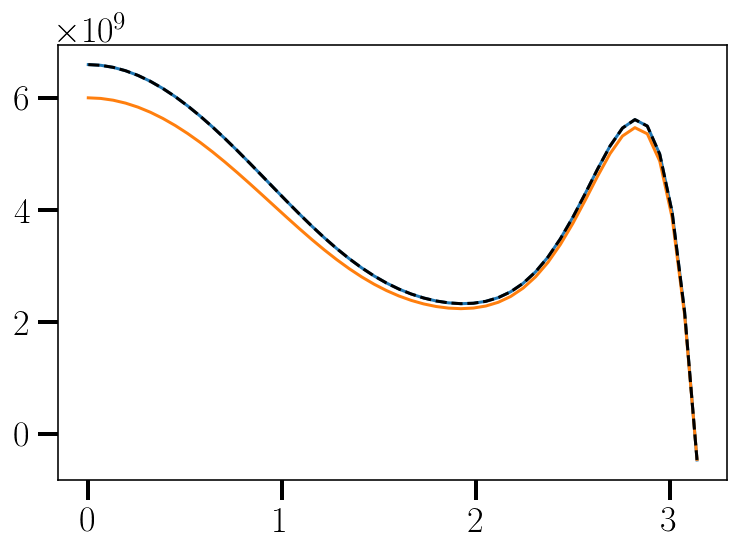

In [29]:
%%time
l=0
m=0

plt.plot(theta,numeric_ylm(Bk_0,l,m,params2,derivs,betas).real)
plt.plot(theta,numeric_ylm(Bk_0,l,m,params2,derivs,betas,sigma=5).real)
plt.plot(theta,Bk0.l0(params).real, '--',color='black')

# Other plots

Some other examples of general useage with plots from the paper

In [17]:
from matplotlib.patches import Polygon
def plot_3x2(first=True):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

    # Create subplots with custom aspect ratios
    #axs = [fig.add_subplot(gs[0, i], aspect='10') for i in range(2)]  # Subplots in the first row

    #horizonatally
    for i in range(2):
        axs[0,i].get_xaxis().set_tick_params(which='both', size=0, labelsize=0)
        axs[1,i].get_xaxis().set_tick_params(which='both', size=0, labelsize=0)

    #vertically
    for i in range(3):
        axs[i,0].set_xticks(np.arange(0.1, 0.59, 0.2))
        axs[i,1].set_xticks(np.arange(0.9, 1.81, 0.3))

        #set triangle
        if i ==0: #
            k1 = 0.01
            k2 = k3 = k1
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        elif i==1: # folded
            k1 = 0.02
            k2 = k3 = 0.01
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        else: #squeezed
            k1 = k2 = 0.05
            k3 = 0.005
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))

        for j in range(2):
            #choose which survey
            if j ==0:
                cosmo_functions = CosmologicalFunctions(cosmo,survey_params=BGS_dict)#SKAO2
                axs[0,j].text(0.25,1.1,'DESI-like BGS',fontsize=20)
            else:
                cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
                axs[0,j].text(1.15,1.1,r'Euclid-like H$\alpha$',fontsize=20)
            z_plot = cosmo_functions.z_survey

            params = cosmo_functions.get_params(k1,k2,theta,z_plot)
            derivs = cosmo_functions.get_derivs(z_plot)
            betas = cosmo_functions.get_beta_funcs(z_plot)

            norm = Bk0.l0(params)
            
            #plot different contributions
            if first:#for first order stuff
                r=0;s=0
                axs[i,j].set_ylim(1.0001e-3,.9)
                axs[i,j].plot(z_plot,np.abs(GR1.l1(params,betas)/norm),'-',linewidth=3,label='GR',color=colors[1])
                axs[i,j].plot(z_plot,np.abs(WA1.l1(params,r,s)/norm),'-',linewidth=2.25,label='WA',color=colors[0])
                axs[i,j].plot(z_plot,np.abs(RR1.l1(params,derivs,r,s)/norm),'-',linewidth=1.5,label='RR',color=colors[2])
                axs[1,0].set_ylabel('$|B_{(1,0)}|/B^N_{(0,0)}$')
                axs[0,1].legend(ncol=3,frameon=False,title_fontsize=12,handlelength=1,columnspacing=1,handleheight=0.5, borderpad=0)

            else:#for second order stuff
                r=s=1/3
                axs[i,j].set_ylim(5e-4,.9)#axs[i,j].set_ylim(5e-3,2)#
                
                if i ==0 and j ==0:
                    axs[i,j].plot(z_plot,np.abs(GR2.l0(params,betas)/norm),'-',label='GR',color=colors[1])

                    axs[i,j].plot(z_plot,np.abs(WA2.l0(params,r,s)/norm),'-',label='WA',color=colors[0])
                    axs[i,j].plot(z_plot,np.abs(RR2.l0(params,derivs,r,s)/norm),'-',label='RR',color=colors[2])
                    axs[i,j].plot(z_plot,np.abs(WARR.l0(params,derivs,r,s)/norm),'--',label='WA/RR',color=colors[3])

                    axs[i,j].plot(z_plot,np.abs(WAGR.l0(params,betas,r,s)/norm),'-.',label='WA/GR',color=colors[4])
                    axs[i,j].plot(z_plot,np.abs(RRGR.l0(params,derivs,betas,r,s)/norm),'-.',label='RR/GR',color=colors[5])
                else:
                    axs[i,j].plot(z_plot,np.abs(GR2.l0(params,betas)/norm),'-',color=colors[2])

                    axs[i,j].plot(z_plot,np.abs(WA2.l0(params,r,s)/norm),'-',color=colors[0])
                    axs[i,j].plot(z_plot,np.abs(RR2.l0(params,derivs,r,s)/norm),'-',color=colors[1])
                    axs[i,j].plot(z_plot,np.abs(WARR.l0(params,derivs,r,s)/norm),'--',color=colors[3])

                    axs[i,j].plot(z_plot,np.abs(WAGR.l0(params,betas,r,s)/norm),'-.',color=colors[4])
                    axs[i,j].plot(z_plot,np.abs(RRGR.l0(params,derivs,betas,r,s)/norm),'-.',color=colors[5])

                axs[1,0].set_ylabel('$|\Delta B_{(0,0)}|/B^N_{(0,0)}$')
                fig.legend(loc=[0.05,0.95],ncol=6,frameon=False,title_fontsize=12,handlelength=1, columnspacing=1, handleheight=0.5, borderpad=0)
                #xs[0,1].legend(ncol=1,frameon=False,title_fontsize=15,handlelength=1.1, handleheight=0.5, borderpad=0)

            
            #we plot scale where it breaks down
            chi = 2*np.pi/k3
            axs[i,0].vlines(cosmo_functions.d_to_z(chi),0,1e+10,linestyles='--',color='black',alpha=1)
            
            axs[i,j].set_yscale('log')
            
            axs[i, j].grid(ls='--', lw=0.75, color='k', alpha=0.2)
            
            axs[2,j].set_xlabel('$z$')
                        
            axs[i,1].get_yaxis().set_tick_params(which='both', size=0, labelsize=0)
            
    
    def triple_triangle_coords(base_x=0.4,base_y=0.5):
        triangle_coords = {
            0: np.array([[base_x+0.05, base_y +0.1-0.3*np.sin(np.pi/3)], [base_x+0.2, base_y+0.1], [base_x+0.35, base_y +0.1-0.3*np.sin(np.pi/3)]]),  # Equilateral triangle
            1: np.array([[base_x, base_y-0.05], [base_x+0.2, base_y+0.05], [base_x+0.4, base_y-0.05]]),  # Folded triangle
            2: np.array([[base_x, base_y-0.05], [base_x+0.4, base_y+0.05], [base_x+0.4, base_y-0.05]])   # Squeezed triangle
        }
        return triangle_coords
    
    triangle_labels = {0: 'Equilateral', 1: 'Folded', 2: 'Squeezed'}
    
    base_x,base_y = 0.4,0.5
    # Plot the triangles on the additional axis
    for i in range(3):
        
        # Create an additional axis for the triangles
        ax_triangles = fig.add_axes([0.8, 0.6-0.25*i, 0.3, 0.3], frameon=False)
        ax_triangles.set_xticks([])
        ax_triangles.set_yticks([])
    
        triangle = Polygon(triple_triangle_coords(0.4,0.5)[i], closed=True, fill=None, edgecolor='black')
        ax_triangles.add_patch(triangle)
        ax_triangles.text(base_x, base_y+0.15, triangle_labels[i])

    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0)
    if first:
        plt.savefig('plots/redshift_first.png', bbox_inches='tight', dpi=300)
    else:
        plt.savefig('plots/redshift_second.png', bbox_inches='tight', dpi=300)


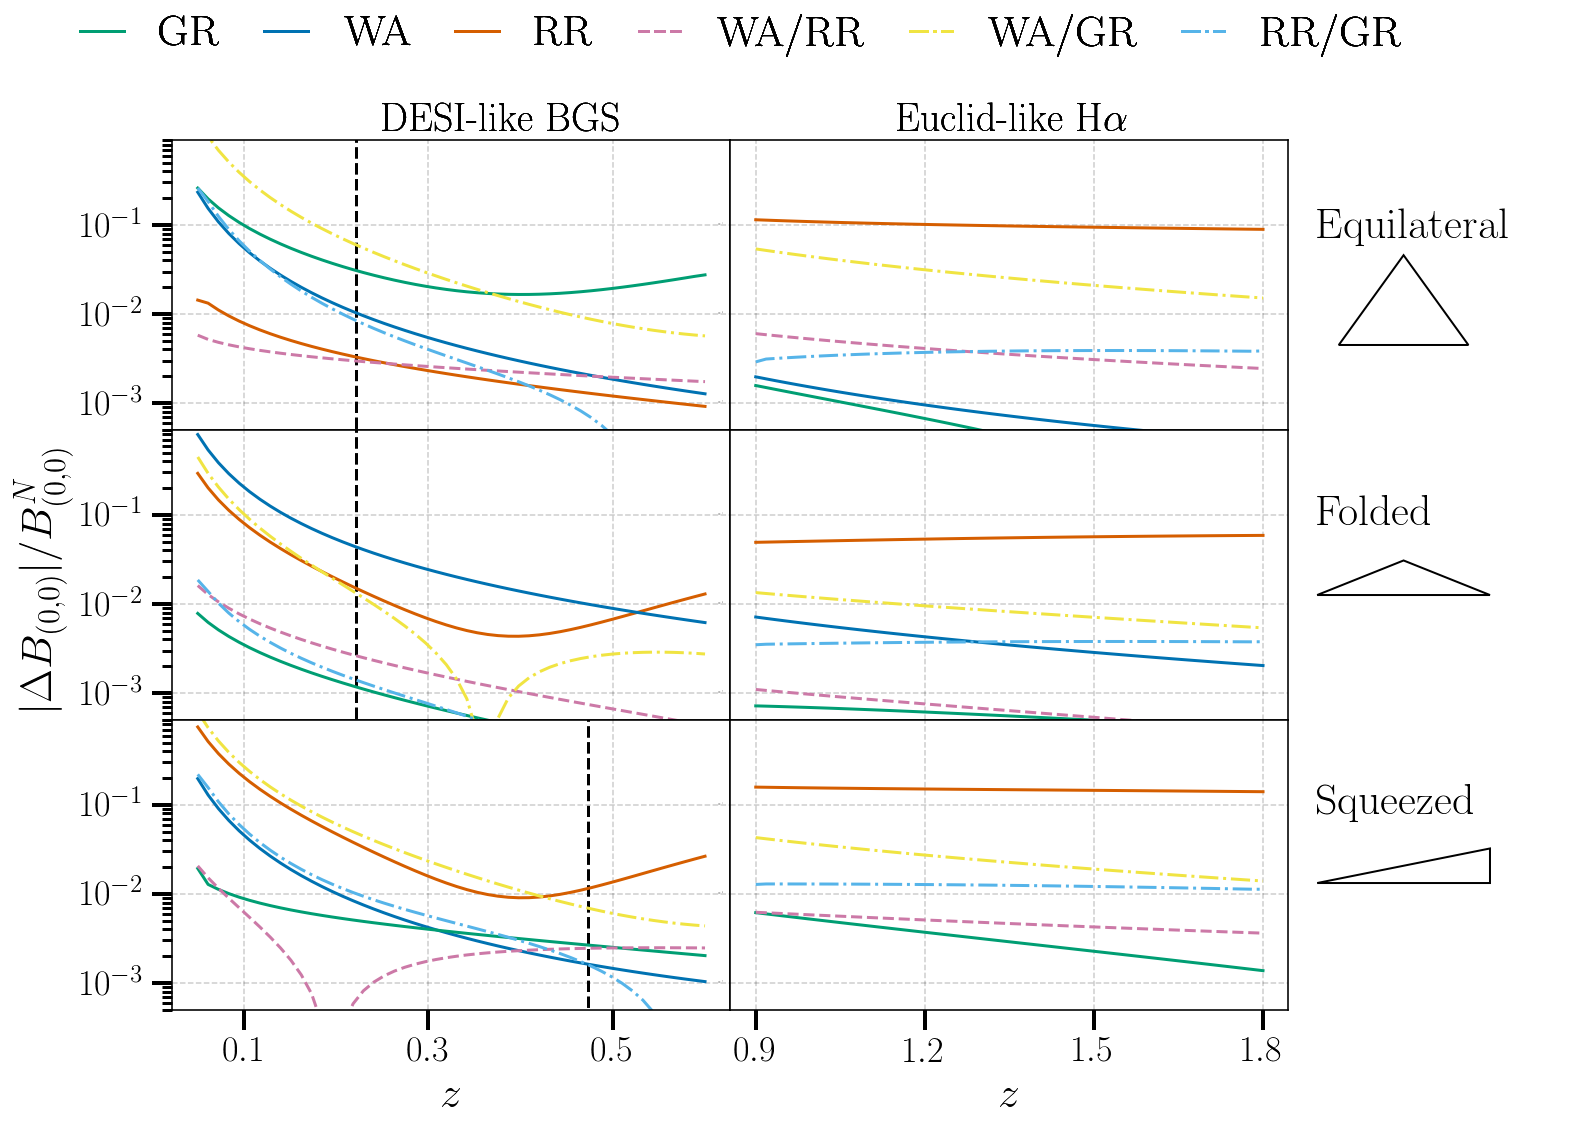

In [21]:
#True for first order - false for second
plot_3x2(True)

In [22]:
def flat_bool(arr,slice_=None):#make flat and impose condtion k1>k2>k3
    if slice_ == None:
        return np.abs(arr).flatten()[tri_bool.flatten()]
    else:
        return np.abs(arr[slice_].flatten()[tri_bool[slice_].flatten()])
#plots over all triangles     
def plot_all(ymin=1e+5,ymax=1e+10,ax=None):
    zz=1
    cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
    derivs = cosmo_functions.get_derivs(zz)
    betas = cosmo_functions.get_beta_funcs(zz)

    # define bins centres
    bin_width = 0.005
    k_bin = np.arange(bin_width,0.07,bin_width)

    k1,k2,k3 = np.meshgrid(k_bin,k_bin,k_bin,indexing='ij')

    #get theta from triagle condition - this create warnings from non-closed triangles
    # Handle cases where floating-point errors might cause cos_theta to go slightly beyond [-1, 1]
    cos_theta = (k3**2 - k1**2 - k2**2)/(2*k1*k2)
    cos_theta = np.where(np.isclose(np.abs(cos_theta), 1), np.sign(cos_theta), cos_theta) #need to get rid of rounding errors

    #if we want to suprress warnings from invalid values we can reset cos(theta) these terms are ignored anyway
    cos_theta = np.where(np.logical_or(cos_theta < -1, cos_theta > 1), 0, cos_theta)
    theta = np.arccos(cos_theta)
    
    params = cosmo_functions.get_params(k1,k2,theta,zz)

    #create bool for closed traingles with k1>k2>k3...
    tri_bool = np.full_like(k1,False).astype(np.bool_)
    fake_k = np.zeros_like(k1)# also create fake k- to plot over as in we define k1 then allow space to fill for all triangles there
    mesh_index = np.zeros_like(k1)
    tri_num = 0
    for i in range(k1.shape[0]+1):
        if i == 0:
            continue
        for j in range(i+1):#enforce k1>k2
            if j == 0:
                continue
            for k in range(i-j,j+1):# enforce k2>k3 and triangle condition |k1-k2|<k3
                if k==0:
                    continue

                #for indexing
                ii = i-1
                jj = j-1
                kk = k-1
                
                #print(ii,jj,kk)
                tri_bool[ii,jj,kk] = True
                mesh_index[ii,jj,kk] = tri_num
                tri_num +=1
                fake_k[ii,ii,ii] = 1 
    
    if ax==None:
        fig, ax = plt.subplots(figsize=(12, 6))
        
    def flat_bool(arr):#make flat and impose condtion k1>k2>k3
        return np.abs(arr.flatten()[tri_bool.flatten()])

    for i in range(len(flat_bool(fake_k))):
        if flat_bool(fake_k)[i]>0:
            ax.vlines(i+1,-1e+10,1e+10,linestyles='--',color='grey',alpha=0.6)

    def thin_xticks(arr,split=7,frac=3):#there are too many xticks at the start
        return np.concatenate((arr[:split][::frac],arr[split:]))
    
    tri_index = np.arange(len(flat_bool(k1))) 
    index_ticks = tri_index[flat_bool(fake_k)>0]+1#+1 as get where k1 steps not the equalateral before...
    ticks = k_bin
    _ = plt.xticks(thin_xticks(index_ticks)[1:], [round(i, 3) for i in thin_xticks(ticks)[1:]])
    
    ax.set_yscale('log')
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(0,tri_index[-1])
    ax.set_xlabel('$k_1$ [h/Mpc]')
    
    #np.array([flat_bool(k1/bin_width),flat_bool(k2/bin_width),flat_bool(k3/bin_width)]).astype(np.int_).T
    
    #plot where k2 steps..
    for i in range(mesh_index.shape[0]):
        for j in range(mesh_index.shape[0]):
            ax.vlines(mesh_index[i,j,j]+1,0,1e+10,linestyles='--',color='grey',alpha=0.2)
    
    if True:
        #so lets find and shade squeezed limit
        is_squeeze = np.zeros_like(mesh_index)
        for i in range(mesh_index.shape[0]):
            for j in range(i+1):
                for k in range(i-j-1,j+1):
                    if k < 0:
                        continue
                    if i+1 > 3*(k+1) and j+1 > 3*(k+1):
                        is_squeeze[i,j,k] = 1e+8

        ax.fill_between(flat_bool(mesh_index), 0,1e+10, where=flat_bool(is_squeeze), color='gray', alpha=0.2)

    return params,derivs,betas,mesh_index,tri_bool

First order

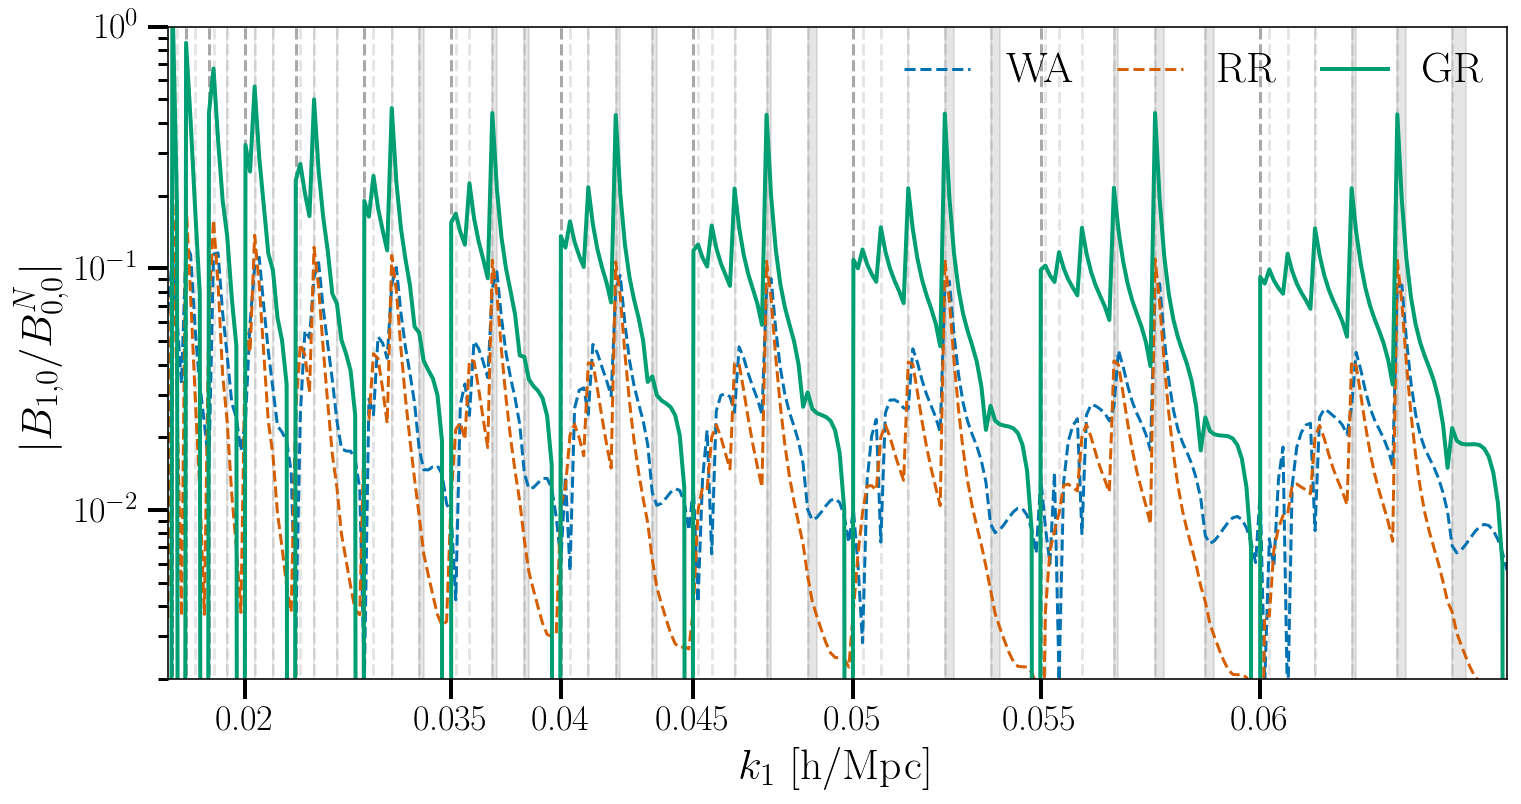

In [29]:
params,derivs,betas,all_k,tri_bool = plot_all(2e-3,1e+0)

norm = Bk0.l0(params)

r=0;s=0
#plt.plot(flat_bool((WA1.l1(params,r,s)+RR1.l1(params,derivs,r,s))/Bk0.l0(params)),'-',label='WS',color='black')
plt.plot(flat_bool(WA1.l1(params,r,s)/norm),'--',label='WA',color=colors[0])
plt.plot(flat_bool(RR1.l1(params,derivs,r,s)/norm),'--',label='RR',color=colors[2])
plt.plot(flat_bool((GR1.l1(params,betas))/norm),'-',label='GR',color=colors[1],linewidth=2)
plt.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

plt.ylabel(r'$|B_{1,0}/B^N_{0,0}|$')
plt.savefig('plots/dipole_all_norm.png', bbox_inches='tight', dpi=300)

Second Order

In [30]:
class WS_GR_mix:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l2(params,derivs,betas,r,s):
        return WA2.l2(params,r,s) +RR2.l2(params,derivs,r,s)+WAGR.l2(params,betas,r,s)+WARR.l2(params,derivs,r,s)+RRGR.l2(params,derivs,betas,r,s)
    

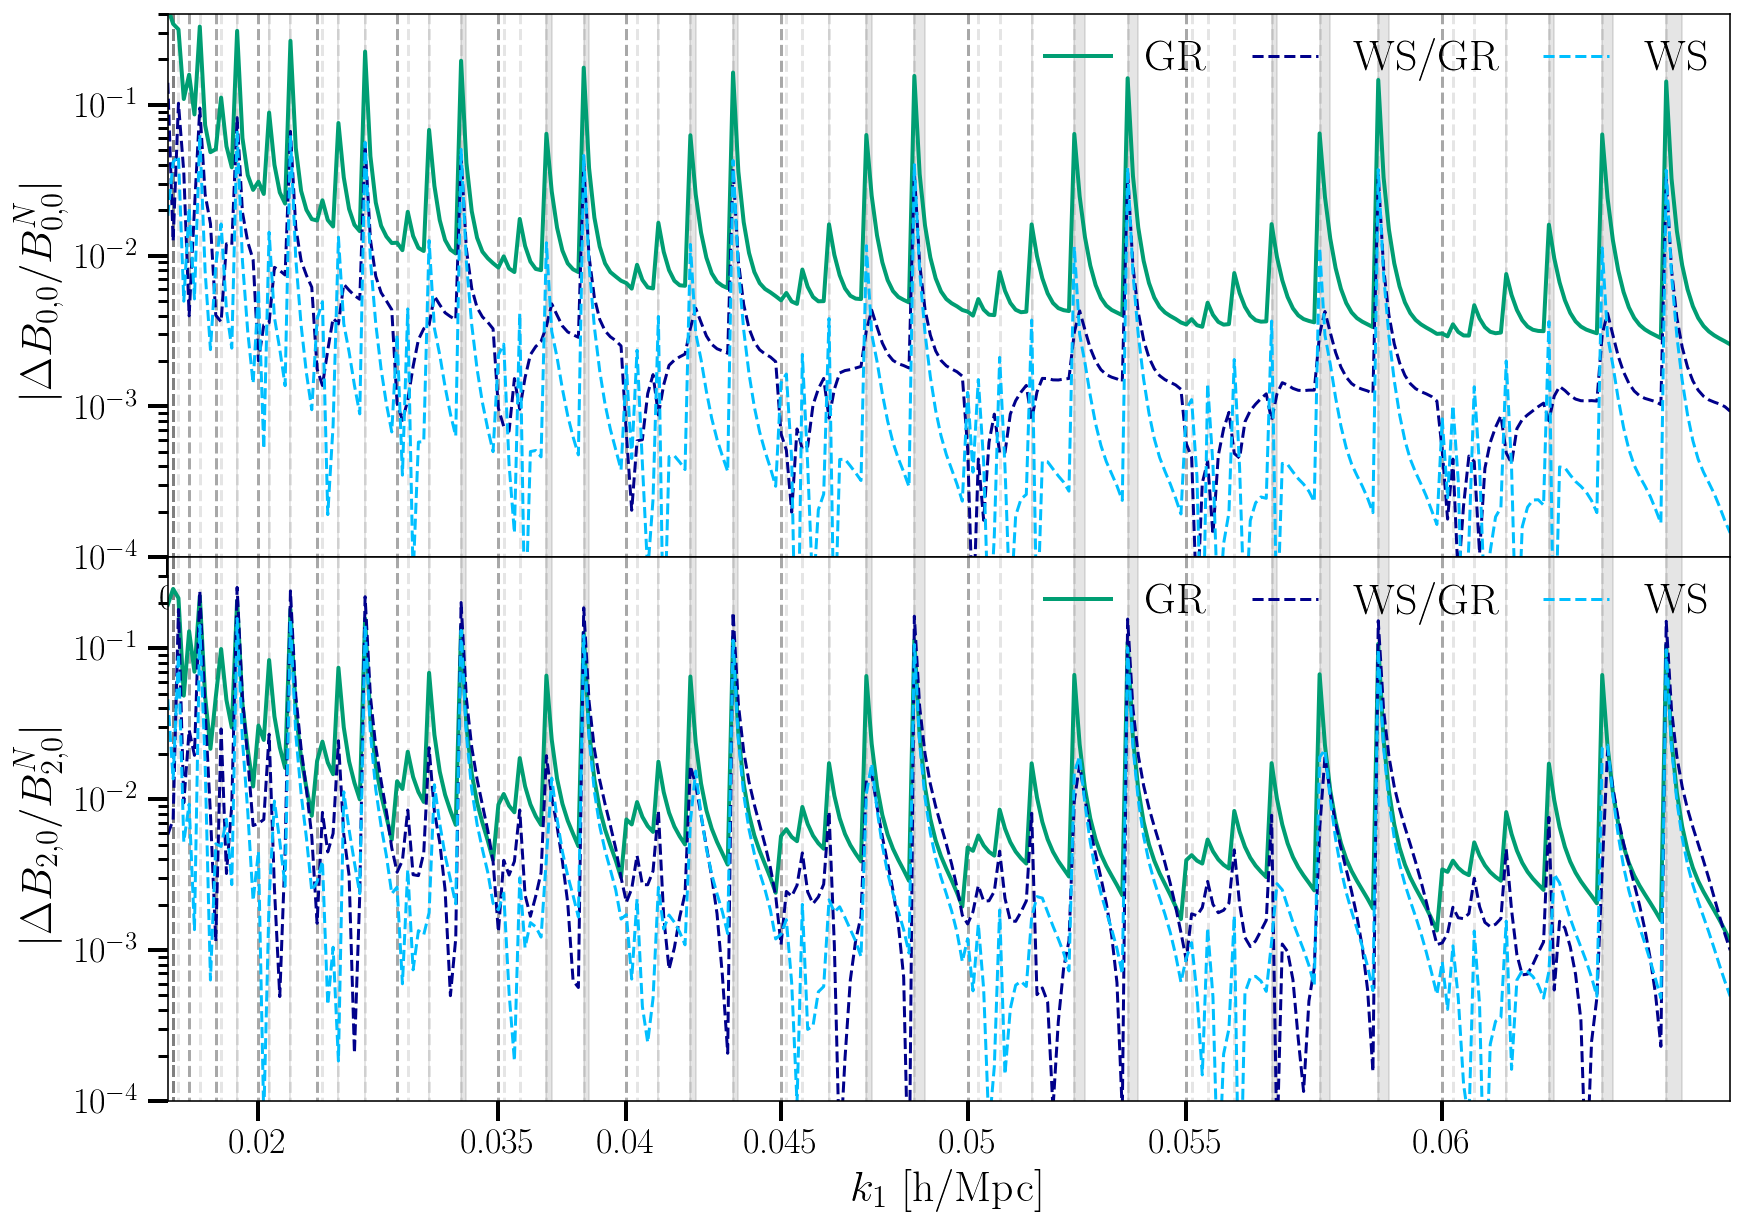

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
params,derivs,betas,mesh_index,tri_bool = plot_all(1e-4,4e-1,ax1)

r=s=0
ax1.plot(flat_bool(GR2.l0(params,betas)/Bk0.l0(params)),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax1.plot(flat_bool(WS_GR_mix.l0(params,derivs,betas,r,s)/Bk0.l0(params)),'--',label='WS/GR',color='darkblue',alpha=1)
ax1.plot(flat_bool(WA_RR.l0(params,derivs,r,s)/Bk0.l0(params)),linestyle='--',label='WS',color='deepskyblue',alpha=1)


#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax1.set_ylabel(r'$|\Delta B_{0,0}/B^N_{0,0}|$')
ax1.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

params,derivs,betas,mesh_index,tri_bool = plot_all(1e-4,4e-1,ax2)
ax2.plot(flat_bool(GR2.l2(params,betas)/Bk0.l2(params)),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax2.plot(flat_bool(WS_GR_mix.l2(params,derivs,betas,r,s)/Bk0.l2(params)),'--',label='WS/GR',color='darkblue',alpha=1)
ax2.plot(flat_bool(WA_RR.l2(params,derivs,r,s)/Bk0.l2(params)),linestyle='--',label='WS',color='deepskyblue',alpha=1)


#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax2.set_ylabel(r'$|\Delta B_{2,0}/B^N_{2,0}|$')
ax2.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)


plt.subplots_adjust(hspace=0)

plt.savefig('plots/quadrupole_all.png', bbox_inches='tight', dpi=300)

In [15]:
#creating composite functions is also useful
class WA_RR:#for all wide separation
    def l0(params,derivs,r,s):
        return WA2.l0(params,r,s)+WARR.l0(params,derivs,r,s)+RR2.l0(params,derivs,r,s)
    
    def l1(params,derivs,r,s):
        return WA1.l1(params,r,s) + RR1.l1(params,derivs,r,s)
    
    def l2(params,derivs,r,s):
        return WA2.l2(params,r,s)+WARR.l2(params,derivs,r,s)+RR2.l2(params,derivs,r,s)
    
class WA_RR_GR:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+GR2.l0(params,betas)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l1(params,derivs,betas,r,s):
        return WA1.l1(params,r,s) +RR1.l1(params,derivs,r,s)+GR1.l1(params,betas)
    
    def l2(params,derivs,betas,r,s):
        return WA2.l2(params,r,s) +RR2.l2(params,derivs,r,s)+GR2.l2(params,betas)+WAGR.l2(params,betas,r,s)+WARR.l2(params,derivs,r,s)+RRGR.l2(params,derivs,betas,r,s)
